# Factors influencing an individual's  income

## Abstract
An individual’s annual income results from various factors. 

The objective of this project is to use publicly donated 'adult' datasets from the UCI machine learning repository and apply machine learning techniques in predicting an individual's income based on personal information.

This project is a supervised classification prediction use case. This project applies the entire process starting with data collection and import, data health check and cleaning, Exploratory data analysis (EDA), applying various supervised classification machine learning algorithms for predicting income, using hyperparameters and validating the accuracy of the model, and finding insights. 

## Introduction
I have chosen this project to apply my knowledge of machine learning in this interesting classification use case.<br>
This 'adult' dataset is simple and does not require any domain knowledge. This dataset is easy for beginners to understand and apply machine learning techniques.

## Dataset

Dataset named “adult” used in this project is downloaded from the UCI machine learning repository. Data extraction was done by Barry Becker from the 1994 Census database of the USA. The Census activity takes place once a decade in the entire country. It is a procedure that acquires complete and reliable information such as demographic, social and economic characteristics about people in a given population. The data collected includes age, gender, marital-status, country of origin, employment, education, etc.<br>
[UCI Link](https://archive.ics.uci.edu/ml/datasets/adult)

UCI Machine learning repository is a very good source for beginner data science learners. UCI provides real work datasets for practising and applying machine learning techniques.

adults.csv data file contains 32,561 individuals’ demographic, educational and job details and their income category.<br>

This 'adult' dataset is simple and does not require any domain knowledge. I have chosen this dataset as it is easy for beginners to understand and apply machine learning techniques and the whole end-to-end process.

####  Dataset Fields
The dataset contains 15 columns
- Target column: income 
    - The income is divided into two classes: <=50K and >50K
- Number of other attributes: 14
    - These are the demographics and other features to describe a person.

####  Attribute information:
1.	<b>age</b>: Continuous. Age of an individual.
2.	<b>workclass</b>: Categorical. Work category of any individual. Values are Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3.	<b>fnlwgt</b>: Continuous.It is weight assigned by US Census bureau to each row. Simlar final weight ( fnlwgt ) means two samples have similar features like race, education etc.
4.	<b>education</b>: Categorical. Values are Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5.	<b>education-num</b>: Continuous.
6.	<b>marital-status</b>: Categorical. Values are Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7.	<b>occupation</b>: Categorical. Values are Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8.	<b>relationship</b>: Categorical. Values are Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9.	<b>race</b>: Categorical. Values are White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10.	<b>sex</b>: Categorical. Values are Female, Male.
11.	<b>capital-gain</b>: Continuous.
12.	<b>capital-loss</b>: Continuous.
13.	<b>hours-per-week</b>: Continuous.
14.	<b>native-country</b>: Categorical. Values are United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
15.	<b>income</b>: Categorical. Values are <=50K,>50K        

## Implementation Process

I have followed the below process for this project.

1. Import datasets
    1. Analysis and preparation of imported datasets.
    2. Checking and handling missing and duplicate values.
2. Exploratory data analysis  ( EDA )
    1. Encoding categorical data to numbers before applying machine learning model, correlation.
    2. Checking correlation.
    3. Checking data distribution and imbalance.
    4. Finding insight from data.
3. Machine learning
    1. Preparing test and train data set
    2.Training various Classification machine learning models
        1. Logistic Regression
        2. Random Forest
        3. K-Nearest Neighbours
        4. Support Vector Machines
        5. Gaussian Naive Bayes
        6. Naive Bayes
        7. XGB
        8. Decision Tree
        9. Bagging Decision Tree
        10. Boosting Decision Tree
    3. Performing hyperparameter tuning in the best model
    4. Checking accuracy and scoring various model
5. Results and Insights.

### Importing required libraries 

In [1]:
# Installling required libraries if required
# !pip install imblearn
# !pip install scikit-learn
# !pip install pandas
# !pip install seaborn

In [2]:
# Import required libraries
import warnings  # to ignore warnings
warnings.filterwarnings('ignore')

import pandas as pd  # for data import and handling
import numpy as np  # for data manipulation 
import seaborn as sns   # for data visualisation 
import matplotlib.pyplot as plt # for data visualisation

from sklearn.preprocessing import LabelEncoder  # For labelling categorical data to numeral 

# Importing required classfication model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Import model_selection
from sklearn import model_selection
from sklearn.utils import class_weight
# Importing classfication report
from sklearn.metrics import classification_report
# Importing confustion matrix
from sklearn.metrics import confusion_matrix

# for hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV

import time

### Importing dataset
- Importing adult.csv dataset file. File is download and saved in datasets folder.
- As file doesn't have header therefore assigning header to all columns based on dataset description in UCI website.
- There was white spaces in values in csv file which creating issues in later processing therefore using skipinitialspace to remove whitespaces

In [3]:
adult_income=pd.read_csv('datasets/adult.csv',
                         skipinitialspace = True,
                         names=["age","workclass","fnlwgt","education","education-num","marital-status","occupation",
                                "relationship", "race","sex","capital-gain","capital-loss","hours-per-week",
                                "native-country","income"])

#### Analysis of imported datasets

Checking first 5 records of adult_income dataset.

In [4]:
adult_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Checking count of rows and columns in adult_income dataset.

In [5]:
print("Dataset 'adult_income' has {} rows and {} columns.".format(adult_income.shape[0],adult_income.shape[1]))

Dataset 'adult_income' has 32561 rows and 15 columns.


Checking columns data type and other details of adult_income dataframe

In [6]:
adult_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##### Checking and handling missing and duplicate values.

Checking if there are any null values in data set.

In [7]:
# Checking if there is any null values
adult_income.isnull().values.any()

False

In [8]:
# finding sum of all null values
adult_income.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

###### Observation:
- Summary showing there is no null records in dataset. Let's do further analysis to check quality of dataset.
- Checking Unique values in each feature column.

In [9]:
print(adult_income.nunique())

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64


#### Printing unique values of each columns. Most of columns are categorical so unique values must be limited.

In [10]:
for col in adult_income:
    print(col)
    print(adult_income[col].unique())

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt
[ 77516  83311 215646 ...  34066  84661 257302]
education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-

#### Observations
  - Features are either categorical or numeric.
  - It is also clearly visible that dataset contains question-mark '?' in some categorical columns. Question mark '?' must be missing values.

#### Finding columns which contains question-mark '?' 

In [11]:
for col in adult_income:
    for value in adult_income[col].unique():
        if str(value) == "?":
            print(col)

workclass
occupation
native-country


###### Observation:
- Columns workclass, occupation and native-country contains question-mark '?' for some values.These should be consider as null /missing values<br>
- Replacing question marks with NaNs.

In [12]:
adult_income[adult_income == '?'] = np.nan

#### Checking dataset info again..

In [13]:
adult_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Checking for null values again.

In [14]:
adult_income.isnull().values.any()

True

In [15]:
adult_income.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

###### Observation: 
- There are now null values in identified columns workclass,occupation and native-country 
- We can replace these categorical values with mode (most common ) value.

Replacing missing values with mode

In [16]:
for col in ['workclass', 'occupation', 'native-country']:
    adult_income[col].fillna(adult_income[col].mode()[0], inplace=True)

Checking null value again.

In [17]:
adult_income.isnull().values.any()

False

#### Checking for duplicates values :

In [18]:
adult_income.duplicated().sum()

24

###### Observation: 
- There are 24 duplicate values in dataset.
- Removing duplicate values

In [19]:
# Drop duplicate values from dataset
adult_income.drop_duplicates(inplace=True)

In [20]:
print("After removing duplidate dataset 'adult_income' has {} rows and {} columns.".format(adult_income.shape[0],
                                                                                           adult_income.shape[1]))

After removing duplidate dataset 'adult_income' has 32537 rows and 15 columns.


### Exploratory data analysis ( EDA )
Let's understand the dataset for correlation, distribution and imbalance and try to find some insights.

#### Encoding categorical data to numbers before applying machine learning model, correlation.

In [21]:
# We have observe that object type columns are categorical in our dataset     
categorical_column = adult_income.select_dtypes(include=['object']).columns.tolist()
print(categorical_column)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


In [22]:
# Creating copy of dataset in categorical state for distribution analysis
adult_income_cat = adult_income.copy()

In [23]:
# Creating instance of labelencoder
label_encoder = LabelEncoder()

# Assigning numerical values to categorical values
for col in categorical_column:
    label_encoder.fit(adult_income[col])
    adult_income[col] = label_encoder.transform(adult_income[col])

In [24]:
# Checking dataset after label encoding
adult_income.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
workclass,32537.0,3.094446,1.107549,0.0,3.0,3.0,3.0,7.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education,32537.0,10.297507,3.870142,0.0,9.0,11.0,12.0,15.0
education-num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
marital-status,32537.0,2.611427,1.506301,0.0,2.0,2.0,4.0,6.0
occupation,32537.0,6.139288,3.973173,0.0,3.0,6.0,9.0,13.0
relationship,32537.0,1.446538,1.607064,0.0,0.0,1.0,3.0,5.0
race,32537.0,3.665827,0.848847,0.0,4.0,4.0,4.0,4.0
sex,32537.0,0.669238,0.470495,0.0,0.0,1.0,1.0,1.0


####  Checking Correlation

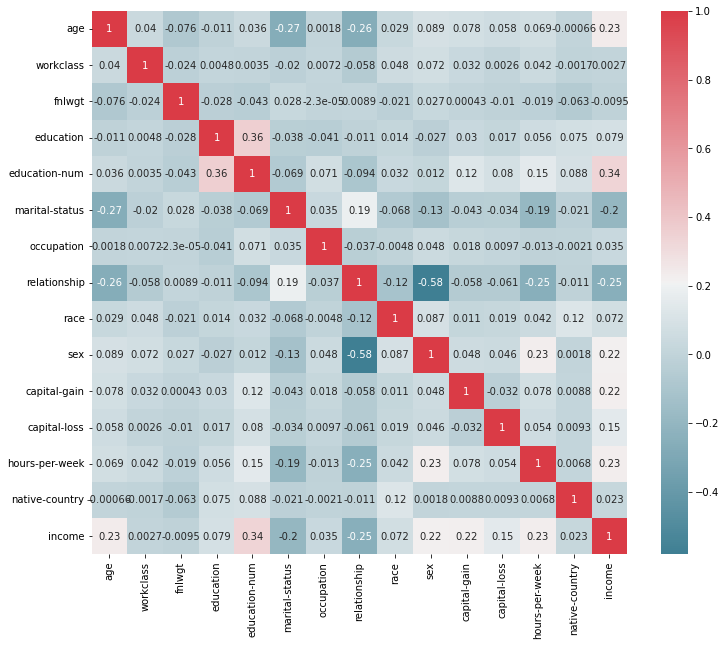

In [25]:
# Finding correlation and displaying correlation matrix
corrMatrix = adult_income.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(corrMatrix,annot=True,xticklabels=corrMatrix.columns, yticklabels=corrMatrix.columns,
             cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

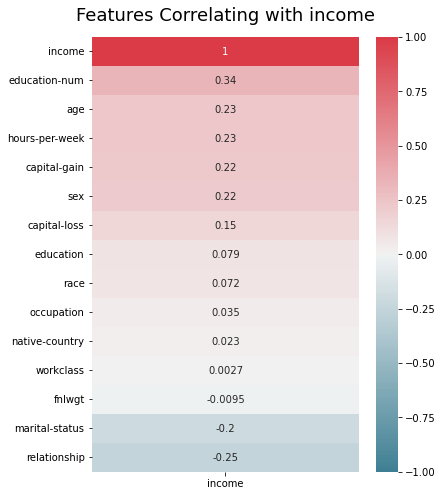

In [26]:
# Checking in sorted way feauteres correlating with income ( prediction target )
plt.figure(figsize=(6, 8))
heatmap = sns.heatmap(adult_income.corr()[['income']].sort_values(by='income', ascending=False), vmin=-1, vmax=1, 
                      annot=True,cmap=sns.diverging_palette(220,10,as_cmap=True))
heatmap.set_title('Features Correlating with income', fontdict={'fontsize':18}, pad=16);


##### Observation:
- Most of feature have positive correlation with income.
- education-num,age and hours-per-week feature are top positively correlated with income.

#### Checking data distribution and imbalance

Checking data distribution in terms of count of records in dataset and with respect to target prediction attribute income.

#### Checking for categorical features 
- income, age, workclass, education, education-num, marital-status ,occupation, relationship,race, sex, native-country
- age and education-num is continous data but after checking data I found itsuitable for categorical analysis.

##### Income : -
- Income column data is categorized into either less than equal to 50K or higher than 50k US dollars.

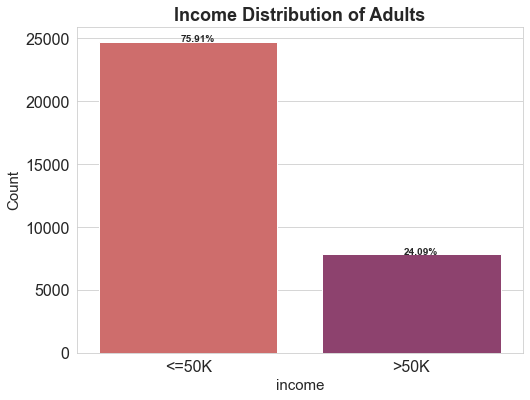

In [27]:
# Plotting count of records for income category
sns.set_style("whitegrid")

plt.figure(figsize=(8,6))
ax =sns.countplot(adult_income_cat['income'], palette='flare')
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
plt.xlabel('income',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=16,rotation = 0)
plt.yticks(fontsize=16)

total = float(len(adult_income_cat['income']) )
for p in ax.patches:
    percentage = '{:1.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/1.8
    y = p.get_height()+ 20
    ax.annotate(percentage, (x, y),ha='center',fontweight='bold')   
plt.show()    

#### Observation of target prediction income column
- Our Survey data sets have 75.91% individuals earning less than equal to 50k dollars while 24.09% income earning more than 50k thousand dollars.
- Data looks imbalance for this but 50k was huge income at the time of 1994 when this data was collected. We can infer that less percentage of population earn income higher than 50k dollars.

##### Generic function to plot count charts for categorical features

In [28]:
# Creating generic function to plot chart of other features with respect to income column.

def plot_dist_chart(df,col,title,xrotation,order_list):
    sns.set_style("whitegrid")
    """ Generic function to count plot distribution charts with respect to target prediciton attribute income.
    
     Args:
         df (Pandas dataframe): Dataset for which plot chart is required to be displayed.
         col (Dataframe column): Dataset column input for 
         title (str): Title for plot.
         xrotation (int): Rotaion of X-axis ticks. For better readability.
         order_list (list): Ordered list for order of the categories. Pass 'None' if not required. 
    """
    plt.figure(figsize=(14,8))
    if order_list == None:
        ax =sns.countplot(df[col], hue =df['income'], palette='flare')
    else:
        ax =sns.countplot(df[col], hue =df['income'], palette='flare', order = order_list)
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xticks(fontsize=14,rotation = xrotation)
    plt.yticks(fontsize=14)
    plt.xlabel(col,fontsize=16)
    plt.ylabel("Count",fontsize=16)
    plt.legend(fontsize=16)

    total = float(len(df['income']) )
    if col != 'native-country': # Excluding percentage for native-country column as it messy to plot % for this feature
        for p in ax.patches:
            percentage = '{:1.2f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width()/1.8
            y = p.get_height()+ 20
            ax.annotate(percentage, (x, y),ha='center')   
    plt.show()   

#### age :-
- age is continuous  column
- We are categorizing it into age groups for analysis of data distribution and income category relationship

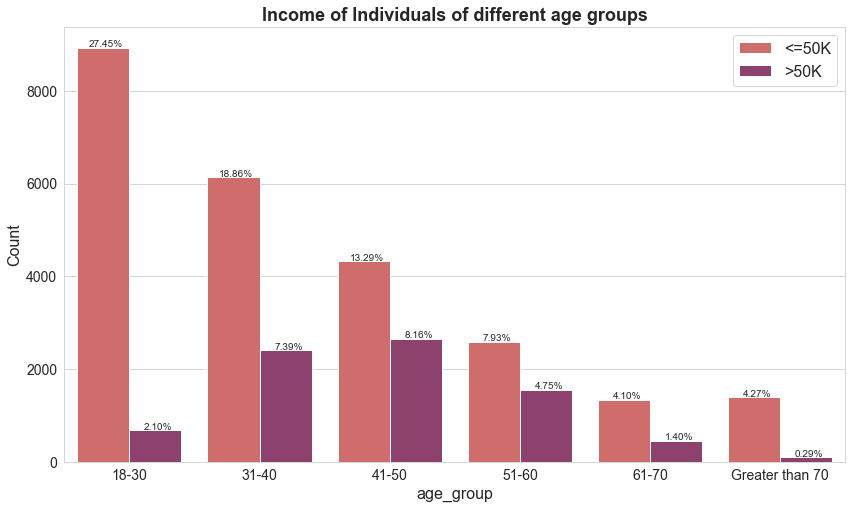

In [29]:
# age: continuous.
# categorizing into age groups for analysis
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "18-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

adult_income_cat['age_group'] = adult_income_cat['age'].apply(age_group)
order_list = ['18-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']

plot_dist_chart(adult_income_cat,'age_group','Income of Individuals of different age groups',0,order_list)

#### Observation of age
- Interesting  to see that individuals earning more than 50k dollars increase as age increase but then it starts decreasing with old age.
- 41-60 age groups have comparable number of people for both high and low earning category.
- Younger people in age group 18-30 is earning more thank 50k is very less.
- People get promoted and appraisal and their salary increase and in old age many people get semi-retired which could be reason for more less earning individuals at old age.

##### workclass :-

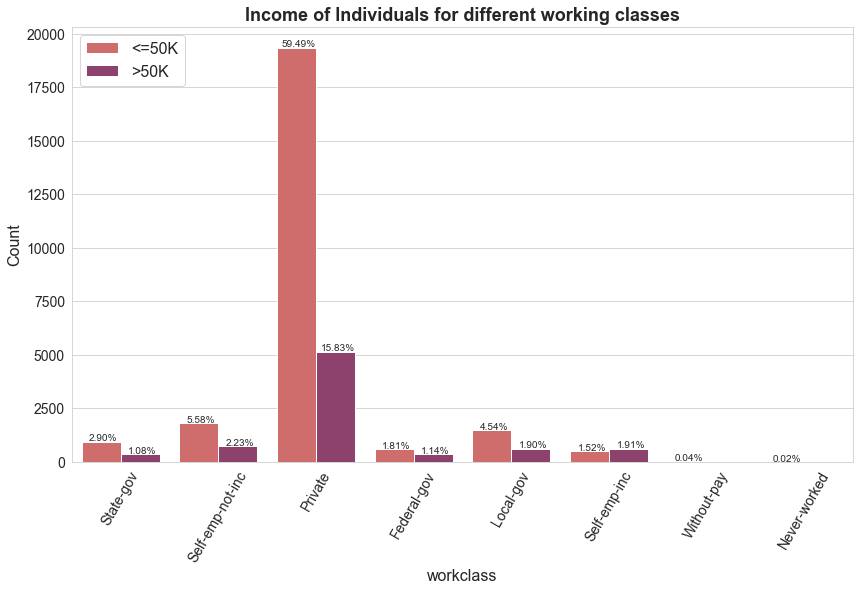

In [30]:
# workclass
plot_dist_chart(adult_income_cat,'workclass','Income of Individuals for different working classes',60,None)

#### Observation of workclass
- 59.49 + 15.83 = 75.32 % individuals are working in private sector. It's looks like private sector was largest employer in USA in 1994. Although difference of income is highest in this category.
- Only Self-employed inc is the category where the number of individuals who earn more than 50k are more than those earning less than it.
- Without pay and never worked category contain negligible data.

##### education :-

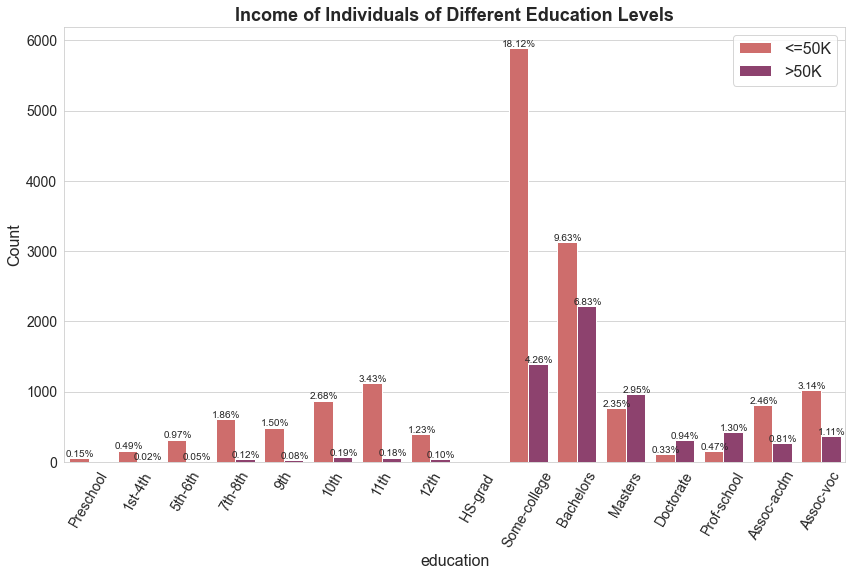

In [31]:
#education:  
# ordering display from lower to higher education
order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th','HS-grad ',
              'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 'Assoc-acdm', 'Assoc-voc']

plot_dist_chart(adult_income_cat,'education','Income of Individuals of Different Education Levels',60,order_list)

#### Observation for education
- Individuals having college and higher education are earning greater than 50k dollars.
- Very few people are in 50k plus earnings with school education up till 12th.
- Master, Doctorate and Prof-School is only category where number of people are higher for 50k plus earning compared to less than 50k.


#### education-num :- 

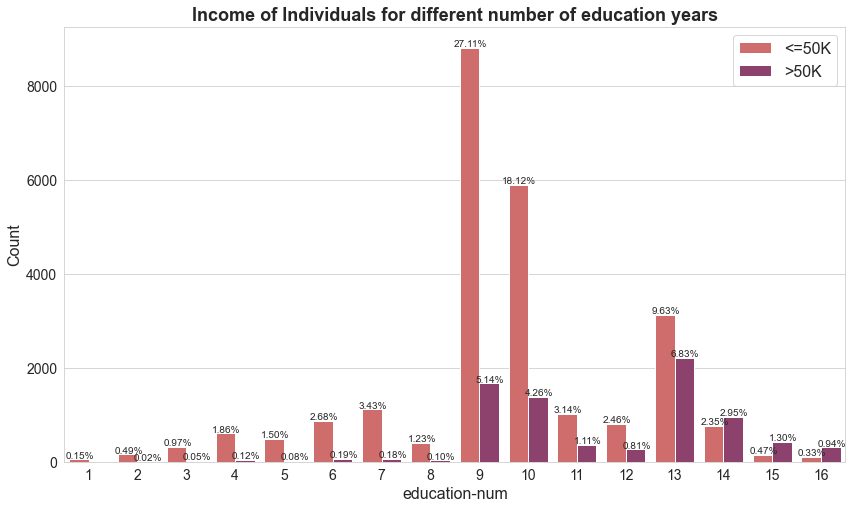

In [32]:
#education-num: 
plot_dist_chart(adult_income_cat,'education-num','Income of Individuals for different number of education years',0,None)

#### Observation for education number of years
- Most of individuals have education number between 9 to 14 years.
- Number of people in higher earning (50k + ) is more in compare to earning less than 50k for higher number of education years starting from 14.

#### marital-status : -

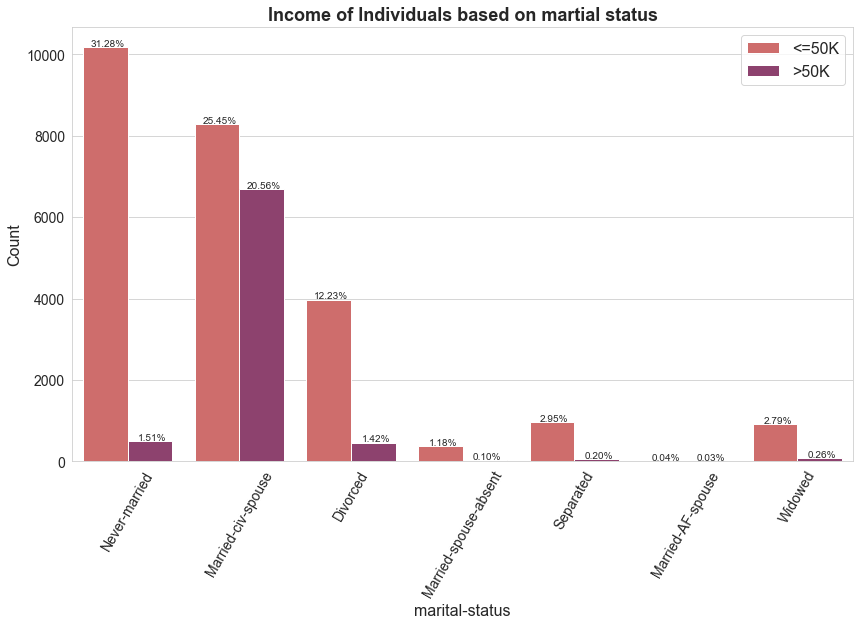

In [33]:
#marital-status:  
plot_dist_chart(adult_income_cat,'marital-status','Income of Individuals based on martial status',60,None)

#### Observation for marital status
- There is huge difference in income for all categories. Only Married-civ-spouse have comparable number of people belonging to higher and lower income.
- Never-married and Divorce have quite big difference in number of people in low (<= 50 k ) and high ( > 50k) income category.

#### occupation :-

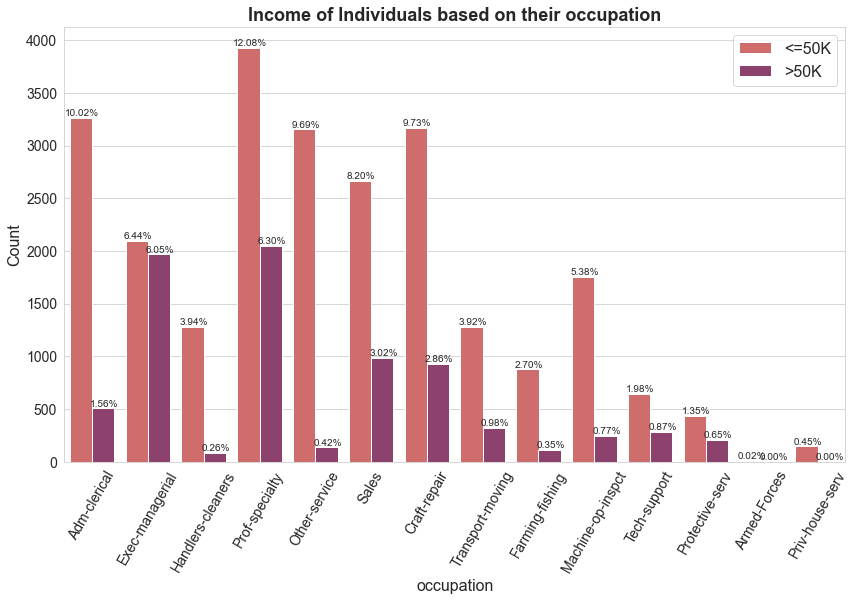

In [34]:
#occupation: 
plot_dist_chart(adult_income_cat,'occupation','Income of Individuals based on their occupation',60,None)

#### Observation for Occupation
- There is no category where number of people are more in higher (50k plus) earning in compare to lower ( <= 50 k) earning.

#### relationship :-

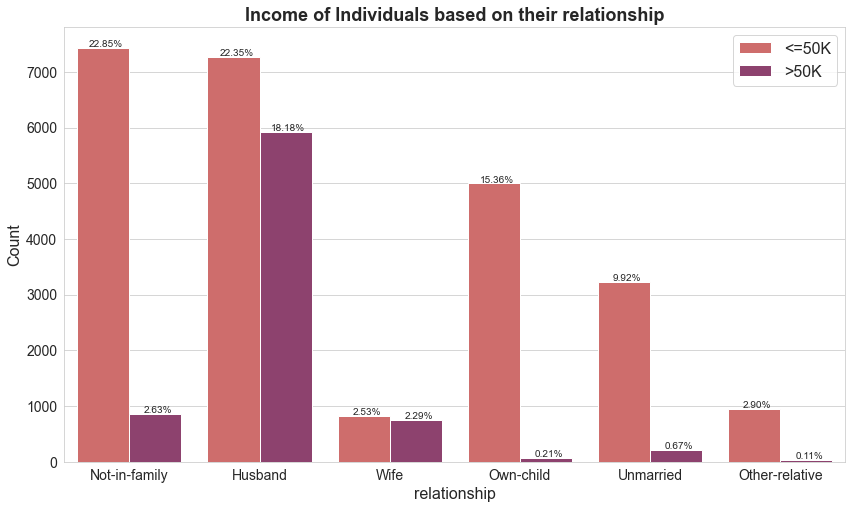

In [35]:
#relationship: 
plot_dist_chart(adult_income_cat,'relationship','Income of Individuals based on their relationship',0,None)

#### Observation for relationship
- Interesting Wife is nearly equally earning high (50k plus) and low ( <= 50k ) income.
- All categories have more low-income individuals.
- Unmarried have very less individuals in high income category.

#### race : -

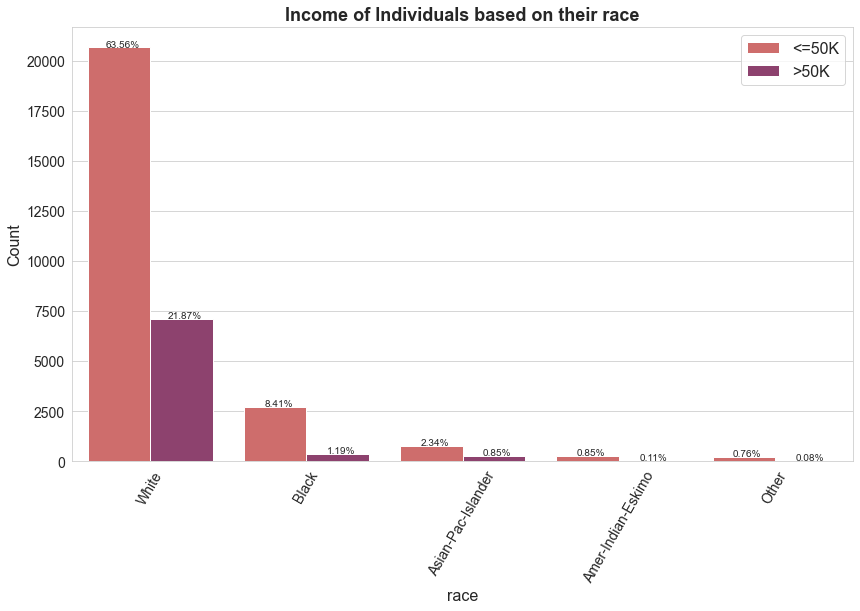

In [36]:
#race:
plot_dist_chart(adult_income_cat,'race','Income of Individuals based on their race',60,None)

#### Observation for race
- Our data is mostly containing white race in compared to other races. This might impact our prediction for other races.
- All races have more individuals with low income (<= 50k ) category.

#### sex :-

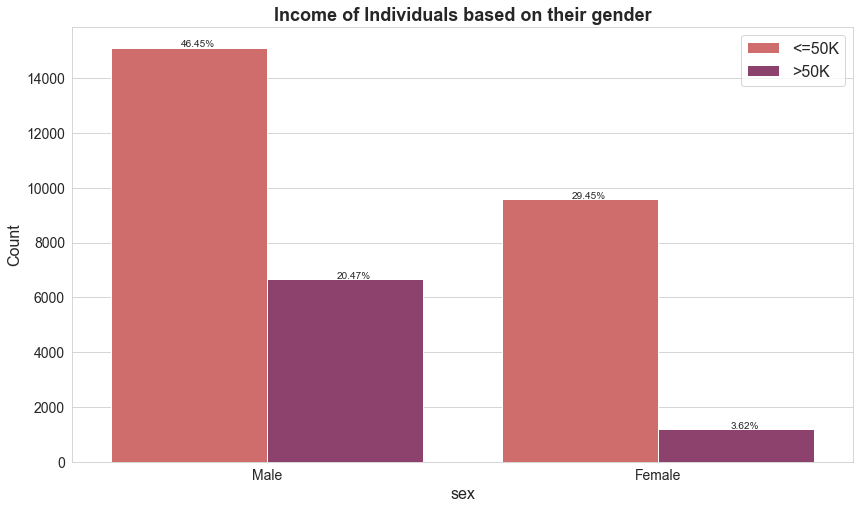

In [37]:
#sex:  
plot_dist_chart(adult_income_cat,'sex','Income of Individuals based on their gender',0,None)

#### Observation for sex
- Female have less number of individuals with high income in compare to male.

#### native-country :-

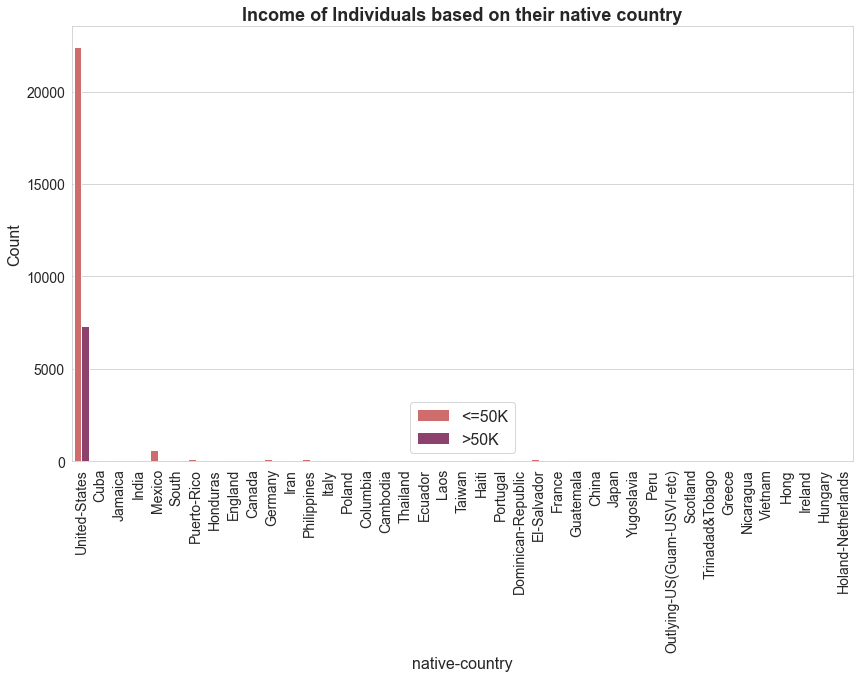

In [38]:
# native-countr
plot_dist_chart(adult_income_cat,'native-country','Income of Individuals based on their native country',90,None)

#### Observation for native country
- Mostly individuals native-country is United States. It could be due to the fact it is Census database of the USA.

#### Checking for continous features 
- fnlwgt,capital-gain,capital-loss

#### Generic function to plot hist chart for numeric continuous feature

In [39]:
# Generic function to plot distribution chart for numeric continuous feature
def plot_cont_dist_chart(df,col,title):
    sns.set_style("whitegrid")
    """ Generic function to plot distribution chart for numberic continous feature
    
     Args:
         df (Pandas dataframe): Dataset for which plot chart is required to be displayed.
         col (Dataframe column): Dataset column input for 
         title (str): Title for distribution plot.
    """
    plt.figure(figsize=(14,8))
    sns.distplot(df[col])
   
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.xlabel(col,fontsize=16)
    plt.ylabel("Dentisity",fontsize=16)

    plt.show() 

#### fnlwgt :- 
- It is weight assigned by US Census bureau to each row. Similar  final weight ( fnlwgt ) means two samples have similar features like race, education etc.


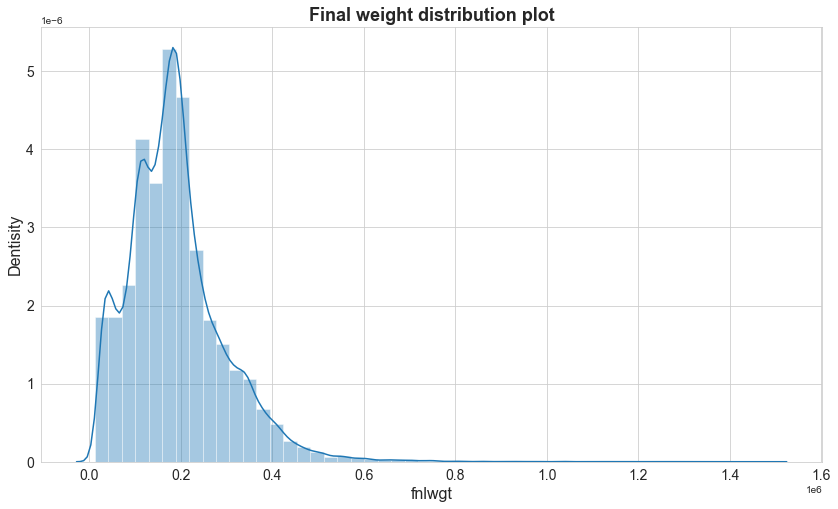

In [40]:
#  fnlwgt
plot_cont_dist_chart(adult_income_cat,'fnlwgt','Final weight distribution plot')

#### Observation for fnlwgt  ( final weight )
- NOTE - values are 1e+06 which is equivalent to 1x10^6 or 1000000
- Density of data is highest around 0.2 (200000). It seems dataset final wight distribution around that, but data seems to have outliers which we will analyse later.


#### capital-gain :-

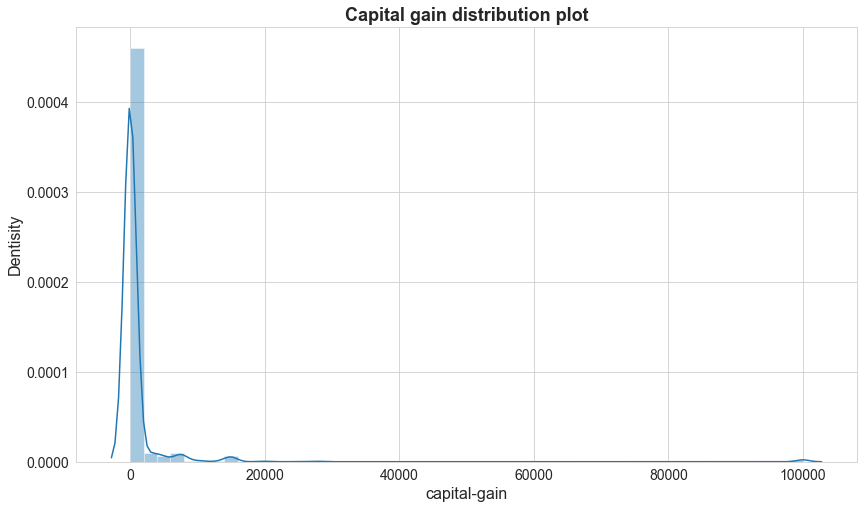

In [41]:
#capital-gain: 
plot_cont_dist_chart(adult_income_cat,'capital-gain','Capital gain distribution plot')

#### Observation for captial gain
- Capital gain is zero for most of individuals in survey dataset
- Some individuals have capital gain between 10 to 20k
- We can also see outliers present in capital-gain.

#### capital-loss :-

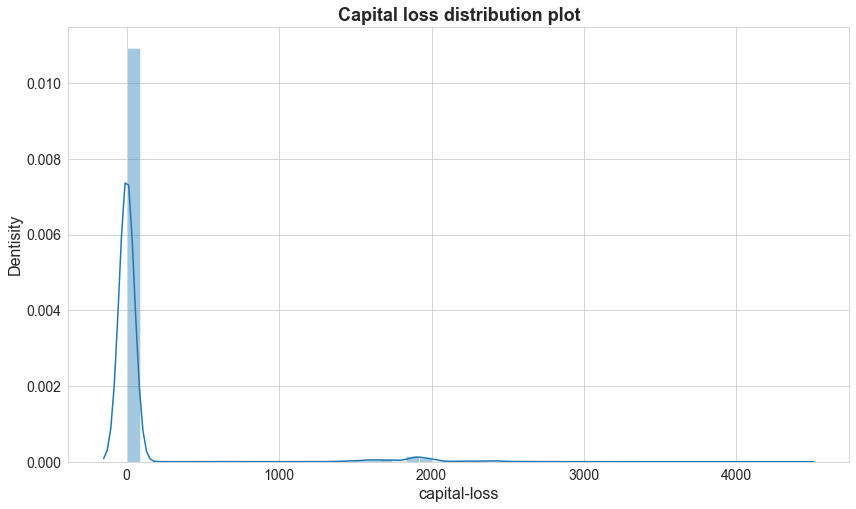

In [42]:
# capital-loss
plot_cont_dist_chart(adult_income_cat,'capital-loss','Capital loss distribution plot')

#### Observation for capital loss
- Capital loss is zero for most of individuals in survey dataset
- Some individuals have capital loss of 2000
- There are some outliers present in capital-loss.

#### Pair plot chart for relationship distribution between continous features and with respect to income

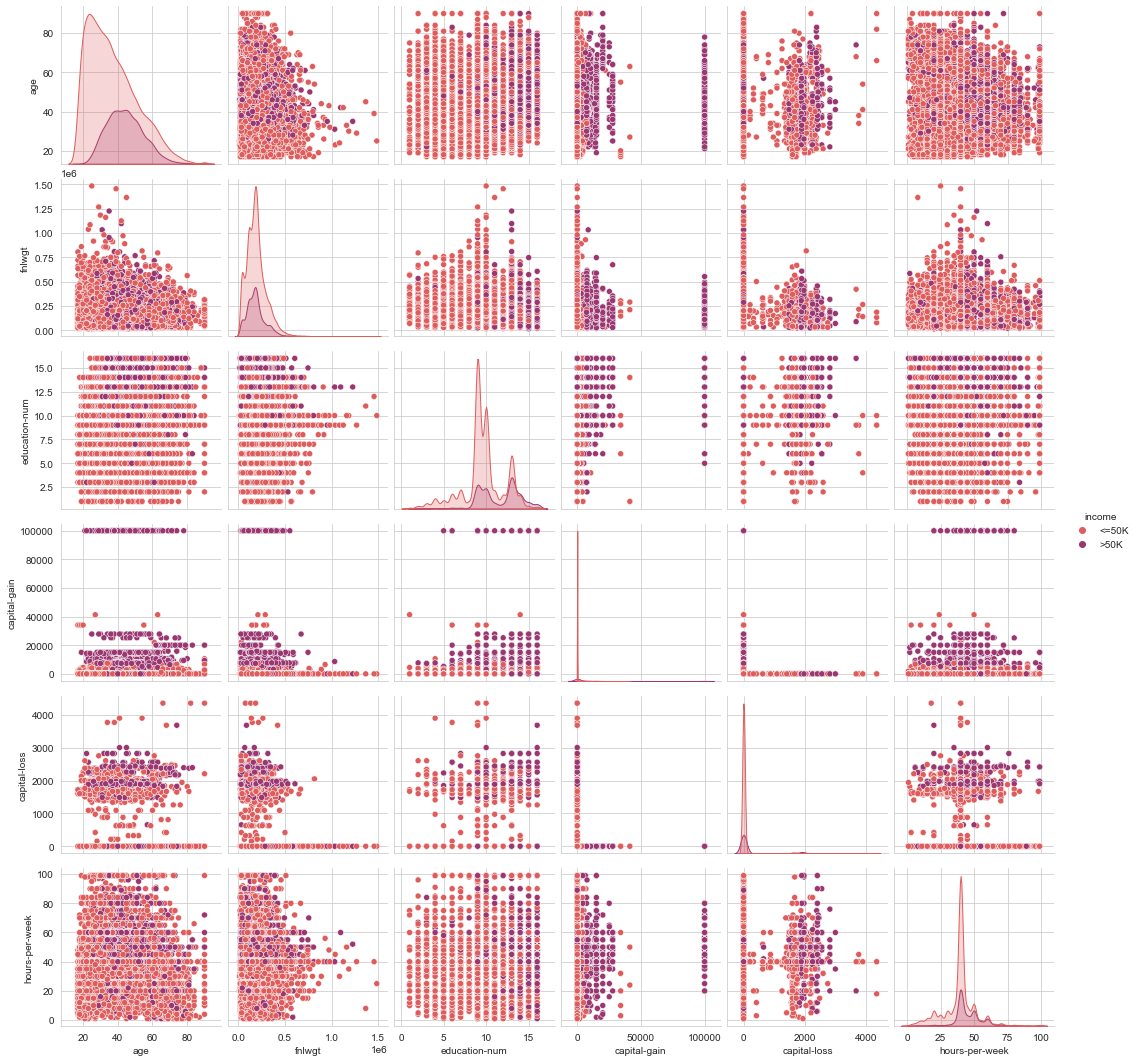

In [43]:
# Pair plot of all features with respect to income
sns.pairplot(adult_income_cat,hue='income',palette='flare')

##### Some Observation of pair plot with respect to income and other feature
- age : 
    - Younger population have lower income. 
    - Higher capital gainer has higher income

- fnlwgt :
    - Final weight number is more of low income.

- education-num :
    - Most individuals have 10 years of education.
    - Higher income indivuals have high number of years of education.

- capital-gain :
    - People with high capital gain are mostly in high income category.
    - If individual had capital gained, then had zero capital loss.

- capital-loss :
    - People with high capital loss are mostly in low-income category. 
    - If individual had capital loss, then had zero capital gain.

- hours-per-week :
    - Most people work between 30-40 hours per week but number of low-income individuals is higher in compare to high income.

#### Finding outliers in continuous  data

#### Generic function to plot box plot to find outliers

In [44]:
# Generic function to plot box chart for finding outliers for continuous feature
def plot_bar_chart(df,col,title):
    sns.set_style("whitegrid")
    """ Generic function to plot boox chart for continous feature
    
     Args:
         df (Pandas dataframe): Dataset for which plot chart is required to be displayed.
         col (Dataframe column): Dataset column input for 
         title (str): Title for distribution plot.
    """
    plt.figure(figsize=(12,6))
    sns.boxplot(df['income'],df[col],palette='flare')
   
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.xlabel('income',fontsize=16)
    plt.ylabel(col,fontsize=16)

    plt.show() 

In [45]:
# Finding numeric continous columns
for col in adult_income_cat.columns:
    if adult_income_cat[col].dtypes == 'int64' :
        print(col)

age
fnlwgt
education-num
capital-gain
capital-loss
hours-per-week


#### age :-

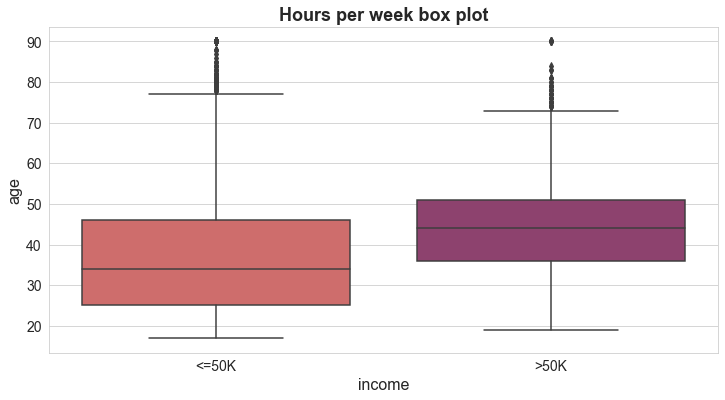

In [46]:
plot_bar_chart(adult_income_cat,'age',"Hours per week box plot")

In [47]:
adult_income_cat['age'].describe()

count    32537.000000
mean        38.585549
std         13.637984
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

#### Observation for age
- mean age of low income( <=50k ) group is lesser than mean age of high income (>50k) group.
- maximum age is 90

#### capital-gain :-

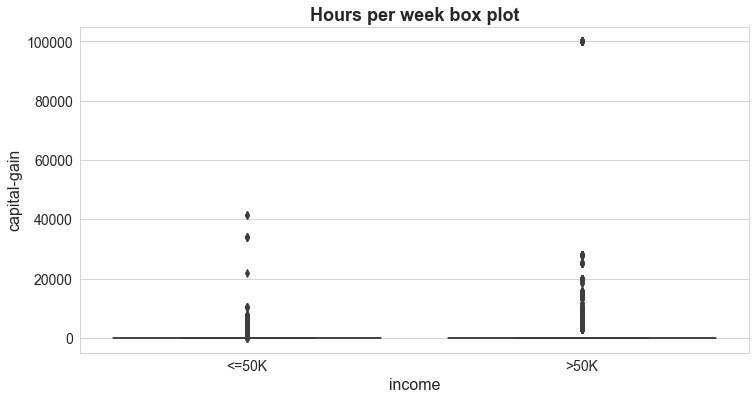

In [48]:
plot_bar_chart(adult_income_cat,'capital-gain',"Hours per week box plot")

In [49]:
adult_income_cat['capital-gain'].describe()

count    32537.000000
mean      1078.443741
std       7387.957424
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

#### Observation for capital-gain
- 99999 entry is outlier, and it looks like incorrect data entry 
- high income group have a greater number of capital-gain evidence.

In [50]:
print(f"There's {adult_income_cat[adult_income_cat['capital-gain'] == 99999].shape[0]} outlier in the capital-gain column")


There's 159 outlier in the capital-gain column


Replacing outlier value with mean.

In [51]:
adult_income_cat['capital-gain'].replace(99999, np.mean(adult_income_cat['capital-gain'].values), inplace=True)
# Doing in label encoded data copy as well
adult_income['capital-gain'].replace(99999, np.mean(adult_income_cat['capital-gain'].values), inplace=True)

#### capital-loss :-

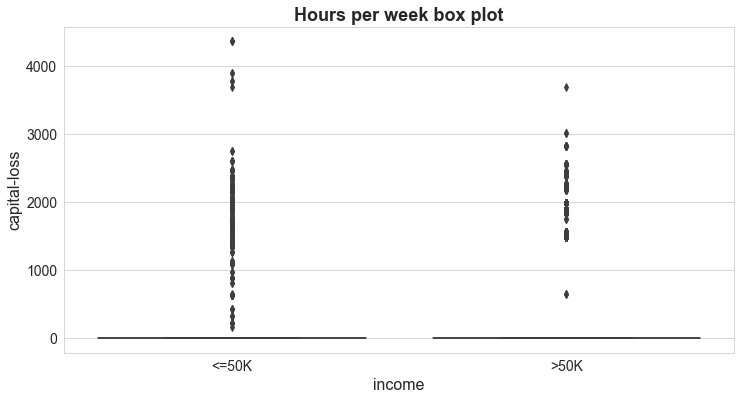

In [52]:
plot_bar_chart(adult_income_cat,'capital-loss',"Hours per week box plot")

In [53]:
adult_income_cat['capital-loss'].describe()

count    32537.000000
mean        87.368227
std        403.101833
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

#### Observation for 
- Low income group have larger number of people who had capital loss.
- Highest capital loss is 4356 dollars.

#### hours-per-week :-

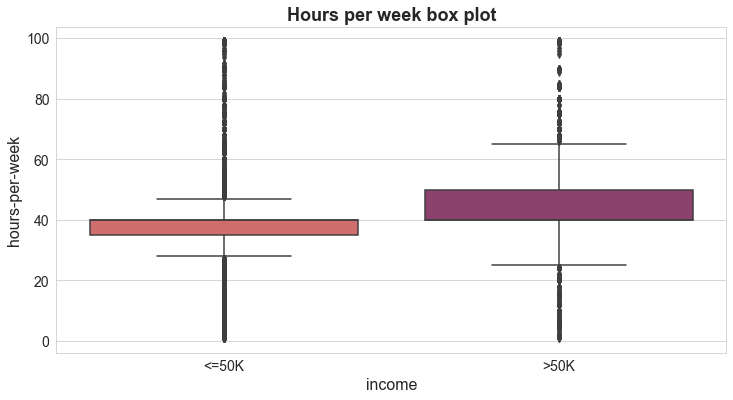

In [54]:
plot_bar_chart(adult_income_cat,'hours-per-week',"Hours per week box plot")

In [55]:
adult_income_cat['hours-per-week'].describe()

count    32537.000000
mean        40.440329
std         12.346889
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

#### Observation for 
- High income group ( > 50k ) mean hours-per-week is higher than low income group ( <=50k ).
- 99999 hours per week is outlier in the hours-per-week column and it looks like incorrect data entry.

In [56]:
print(f"There's {adult_income_cat[adult_income_cat['hours-per-week'] == 99].shape[0]} outlier in the hours-per-week column")

There's 85 outlier in the hours-per-week column


Replacing outlier with mean value

In [57]:
adult_income_cat['hours-per-week'].replace(99, np.mean(adult_income_cat['hours-per-week'].values), inplace=True)
# Doing in label encoded data copy as well
adult_income['hours-per-week'].replace(99, np.mean(adult_income['hours-per-week'].values), inplace=True)

# Machine learning model implementation  for predicting income

#### Cleaned and prepared data set for Machine learning
- Categorical column data in workclass,education,marital-status,occupation,relationship,race,sex,native-country,income has been label encoded using LabelEncoder.
- '?' Missing values in workclass,occupation,native-country column was replaced with mode.
- Duplicates rows was removed.
- Outliers in hours-per-week and capital-gain was replaced with mode.

In [58]:
adult_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174.0,0,40.0,38,0
1,50,5,83311,9,13,2,3,0,4,1,0.0,0,13.0,38,0
2,38,3,215646,11,9,0,5,1,4,1,0.0,0,40.0,38,0
3,53,3,234721,1,7,2,5,0,2,1,0.0,0,40.0,38,0
4,28,3,338409,9,13,2,9,5,2,0,0.0,0,40.0,4,0


## Spliting dataset for training and testing and validation

In [59]:
# Spliting target prediction income column from rest of dataset 
X = adult_income.drop('income',axis=1)
y = adult_income['income']

print ("X dataset: {0}, y dataset: {1}".format(X.shape, y.shape))

X dataset: (32537, 14), y dataset: (32537,)


Prediction column income data is very skewed and imbalace. 75% records are for low income ( <=50% ) 

In [60]:
y.value_counts(normalize=True)

0    0.759074
1    0.240926
Name: income, dtype: float64

In [61]:
# Balancing the skewed data
from imblearn.over_sampling import RandomOverSampler 
rs = RandomOverSampler(random_state=30)
rs.fit(X,y)
X_new,y_new = rs.fit_resample(X, y)
y_new.value_counts(normalize=True)

0    0.5
1    0.5
Name: income, dtype: float64

In [62]:
#  Importing required libraries for train test and validation split
from sklearn.model_selection import train_test_split

# Splitingn datasetfor training and testing , 30% test and 70% train
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

print ("Train dataset: X_train: {0}, y_train: {1}".format(X_train.shape, y_train.shape))
print ("Test dataset: X_test: {0}, y_test: {1}".format(X_test.shape, y_test.shape))

Train dataset: X_train: (34577, 14), y_train: (34577,)
Test dataset: X_test: (14819, 14), y_test: (14819,)


### Training 10 different classifier models

- Logistic Regression
- Random Forest
- K-Nearest Neighbours
- Support Vector Machines
- Naive Bayes
- Gaussian Naive Bayes
- XGB
- Decision Tree
- Bagging Decision Tree
- Boosting Decision Tree

In [63]:
def run_models(X_train, y_train, X_test, y_test, models):
    """ Generic function to run different model and check accuracy
    
    Args:
         X_train(pd.DataFrame): train dataset 
         y_train(pd.DataFrame): train predict dataset
         X_test(pd.DataFrame): test dataset
         y_test(pd.DataFrame): test predict dataset
    """
    
    # To records results
    dfs = []
     
    # List of classifier model to be tested
    models = models
    print(models)
    
    results = []
    
    names = []
    
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    
    target_names = ['<= 50K','> 50K']
    
    all_cf_matrix = []
    
    for name, model in models:
        start_time = time.time()
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=77)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_test_pred = clf.predict(X_test)
        print ('-'*50)
        print ('{0}:'.format(name))
        print ('Classification Matrix:')
        print(classification_report(y_test, y_test_pred, target_names=target_names))
        print ('Confusion Matrix:')
        cf_matrix = confusion_matrix(y_test, y_test_pred)
        plot_confusion_matrix(cf_matrix,name)
        print("Time taken: {:0.2f} seconds".format(time.time() - start_time))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)        
        final = pd.concat(dfs, ignore_index=True)    
        
    return final

In [64]:
# Generic function to plot confustion matrix for different models
def plot_confusion_matrix(cf_matrix,title):
    plt.figure(figsize=(6.4,4.8))
    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

    ax.set_title(f'Confusion Matrix for accuracy of {title}\n\n');
    ax.set_xlabel('\nPredicted Income Values')
    ax.set_ylabel('Actual Income Values ');

    ax.xaxis.set_ticklabels(['<= 50K','> 50K'])
    ax.yaxis.set_ticklabels(['<= 50K','> 50K'])

    plt.show()

#### Running models and displaying Classification Matrix and Confusion Matrix.

[('Logistic Regression', LogisticRegression(random_state=77)), ('Random Forest', RandomForestClassifier(random_state=77)), ('K-Nearest Neighbours', KNeighborsClassifier()), ('Support Vector Machines', SVC(random_state=77)), ('Gaussian Naive Bayes', GaussianNB()), ('Naive Bayes', MultinomialNB()), ('XGB', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=77,
       

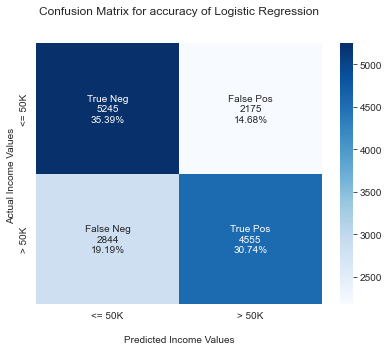

Time taken: 3.05 seconds
--------------------------------------------------
Random Forest:
Classification Matrix:
              precision    recall  f1-score   support

      <= 50K       0.97      0.88      0.92      7420
       > 50K       0.89      0.97      0.93      7399

    accuracy                           0.92     14819
   macro avg       0.93      0.92      0.92     14819
weighted avg       0.93      0.92      0.92     14819

Confusion Matrix:


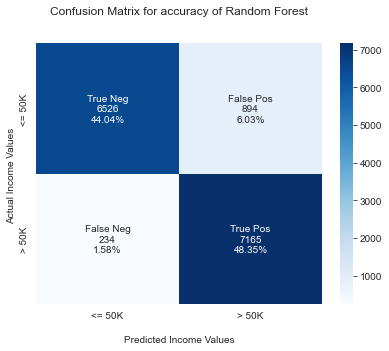

Time taken: 39.97 seconds
--------------------------------------------------
K-Nearest Neighbours:
Classification Matrix:
              precision    recall  f1-score   support

      <= 50K       0.75      0.64      0.69      7420
       > 50K       0.69      0.78      0.73      7399

    accuracy                           0.71     14819
   macro avg       0.72      0.71      0.71     14819
weighted avg       0.72      0.71      0.71     14819

Confusion Matrix:


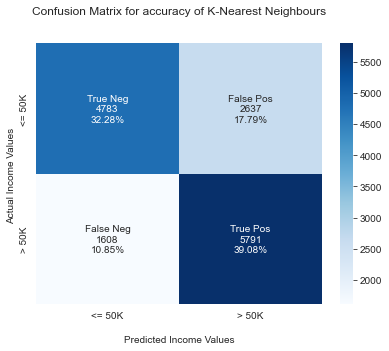

Time taken: 5.04 seconds
--------------------------------------------------
Support Vector Machines:
Classification Matrix:
              precision    recall  f1-score   support

      <= 50K       0.54      0.99      0.70      7420
       > 50K       0.94      0.17      0.29      7399

    accuracy                           0.58     14819
   macro avg       0.74      0.58      0.50     14819
weighted avg       0.74      0.58      0.50     14819

Confusion Matrix:


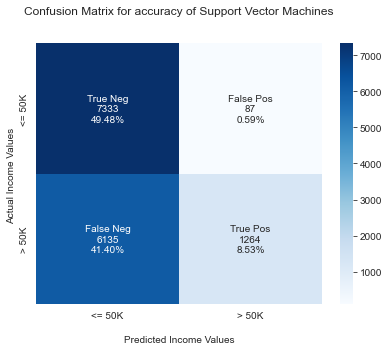

Time taken: 913.02 seconds
--------------------------------------------------
Gaussian Naive Bayes:
Classification Matrix:
              precision    recall  f1-score   support

      <= 50K       0.57      0.94      0.71      7420
       > 50K       0.83      0.29      0.43      7399

    accuracy                           0.62     14819
   macro avg       0.70      0.62      0.57     14819
weighted avg       0.70      0.62      0.57     14819

Confusion Matrix:


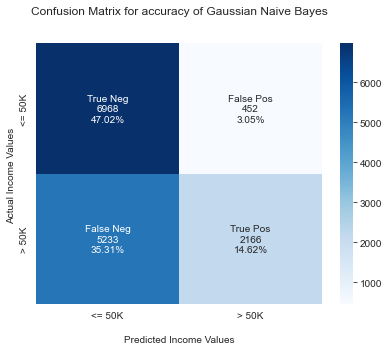

Time taken: 0.58 seconds
--------------------------------------------------
Naive Bayes:
Classification Matrix:
              precision    recall  f1-score   support

      <= 50K       0.57      0.94      0.71      7420
       > 50K       0.83      0.28      0.41      7399

    accuracy                           0.61     14819
   macro avg       0.70      0.61      0.56     14819
weighted avg       0.70      0.61      0.56     14819

Confusion Matrix:


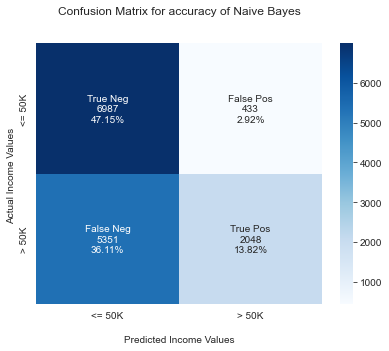

Time taken: 0.63 seconds
--------------------------------------------------
XGB:
Classification Matrix:
              precision    recall  f1-score   support

      <= 50K       0.90      0.83      0.87      7420
       > 50K       0.85      0.91      0.87      7399

    accuracy                           0.87     14819
   macro avg       0.87      0.87      0.87     14819
weighted avg       0.87      0.87      0.87     14819

Confusion Matrix:


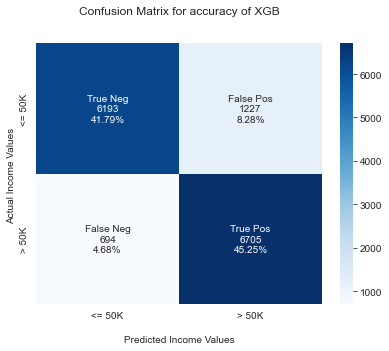

Time taken: 21.31 seconds
--------------------------------------------------
Decision Tree:
Classification Matrix:
              precision    recall  f1-score   support

      <= 50K       0.95      0.85      0.90      7420
       > 50K       0.87      0.96      0.91      7399

    accuracy                           0.91     14819
   macro avg       0.91      0.91      0.91     14819
weighted avg       0.91      0.91      0.91     14819

Confusion Matrix:


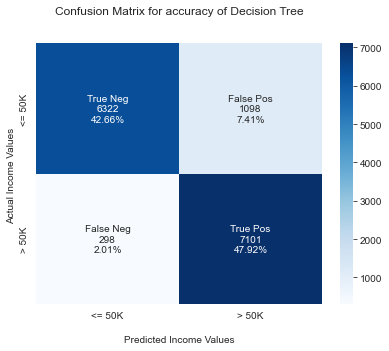

Time taken: 3.30 seconds
--------------------------------------------------
Bagging Decision Tree:
Classification Matrix:
              precision    recall  f1-score   support

      <= 50K       0.93      0.86      0.89      7420
       > 50K       0.87      0.93      0.90      7399

    accuracy                           0.89     14819
   macro avg       0.90      0.89      0.89     14819
weighted avg       0.90      0.89      0.89     14819

Confusion Matrix:


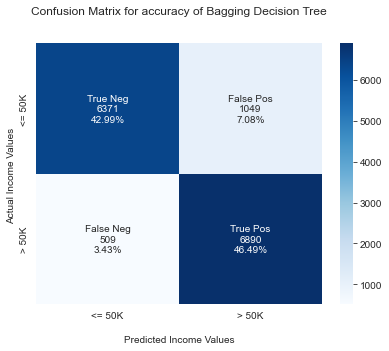

Time taken: 6.68 seconds
--------------------------------------------------
Boosting Decision Tree:
Classification Matrix:
              precision    recall  f1-score   support

      <= 50K       0.87      0.80      0.83      7420
       > 50K       0.81      0.88      0.84      7399

    accuracy                           0.84     14819
   macro avg       0.84      0.84      0.84     14819
weighted avg       0.84      0.84      0.84     14819

Confusion Matrix:


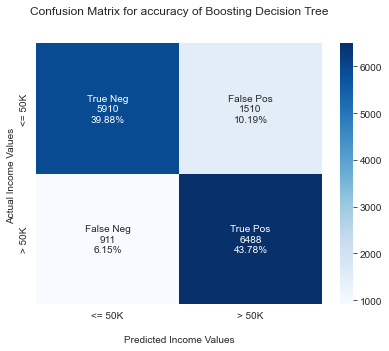

Time taken: 4.94 seconds


In [65]:
# List of classifier model to be tested
models = [ ('Logistic Regression', LogisticRegression(random_state=77)), 
               ('Random Forest', RandomForestClassifier(random_state=77)),
               ('K-Nearest Neighbours', KNeighborsClassifier()),
               ('Support Vector Machines', SVC(random_state=77)), 
               ('Gaussian Naive Bayes', GaussianNB()),
               ('Naive Bayes', MultinomialNB()),
               ('XGB', XGBClassifier(random_state=77)),
               ('Decision Tree', DecisionTreeClassifier(random_state=77)),
               ('Bagging Decision Tree', BaggingClassifier(DecisionTreeClassifier(random_state=77),max_samples=0.5,
                                   max_features=1.0,n_estimators=10)),
               ('Boosting Decision Tree',AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4,
                                   random_state=77),n_estimators=10,learning_rate=0.6))   
             ] 

# Running model and getting results
result = run_models(X_train,y_train,X_test,y_test,models)

In [66]:
# Segregating result to classfication metrics and time metrics 
bootstraps = []
for model in list(set(result.model.values)):
    model_df = result.loc[result.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time']

## Performance metrics
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] 
results_long_nofit = results_long_nofit.sort_values(by='values')

## Time taken metrics
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] 
results_long_fit = results_long_fit.sort_values(by='values')

#### Model accuracy and run time performance analysis

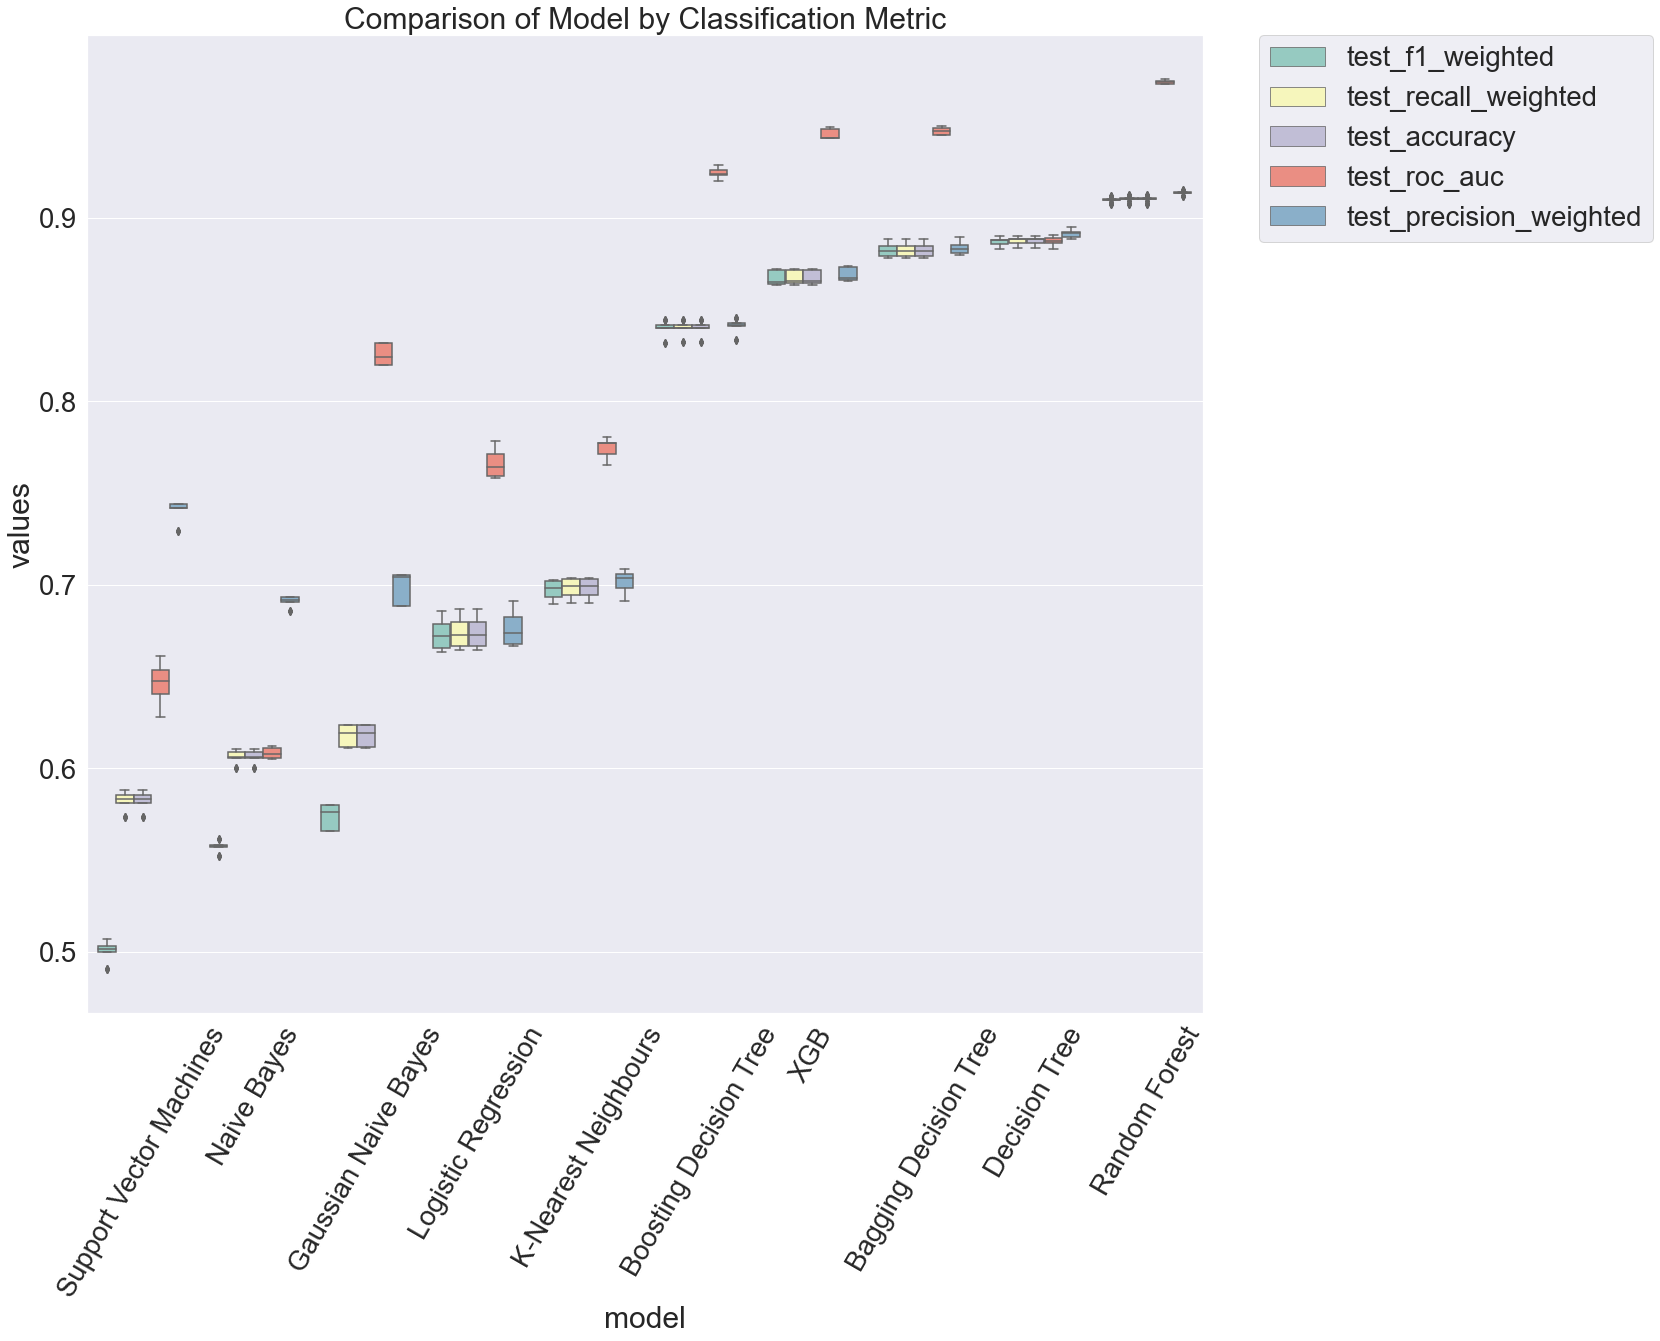

In [67]:
sns.set_style("whitegrid")   
plt.figure(figsize=(20, 18))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.xticks(rotation = 60)
plt.show()

In [68]:
accuracy = results_long_nofit[results_long_nofit['metrics'].isin(['test_accuracy'])]
accuracy_final = round(accuracy.groupby(['model']).mean()* 100,2).sort_values(by='values',ascending=False)

accuracy_final.rename(columns={"values": "Accuracy %"})

,Accuracy %
model,
Random Forest,91.02
Decision Tree,88.73
Bagging Decision Tree,88.26
XGB,86.73
Boosting Decision Tree,84.00
K-Nearest Neighbours,69.84
Logistic Regression,67.46
Gaussian Naive Bayes,61.77
Naive Bayes,60.61


#### Model accuracy results :-
- Random forest classifier have highest accuracy of 91.02 %.
- SVM performance is least with accurracy of 58.16 %.

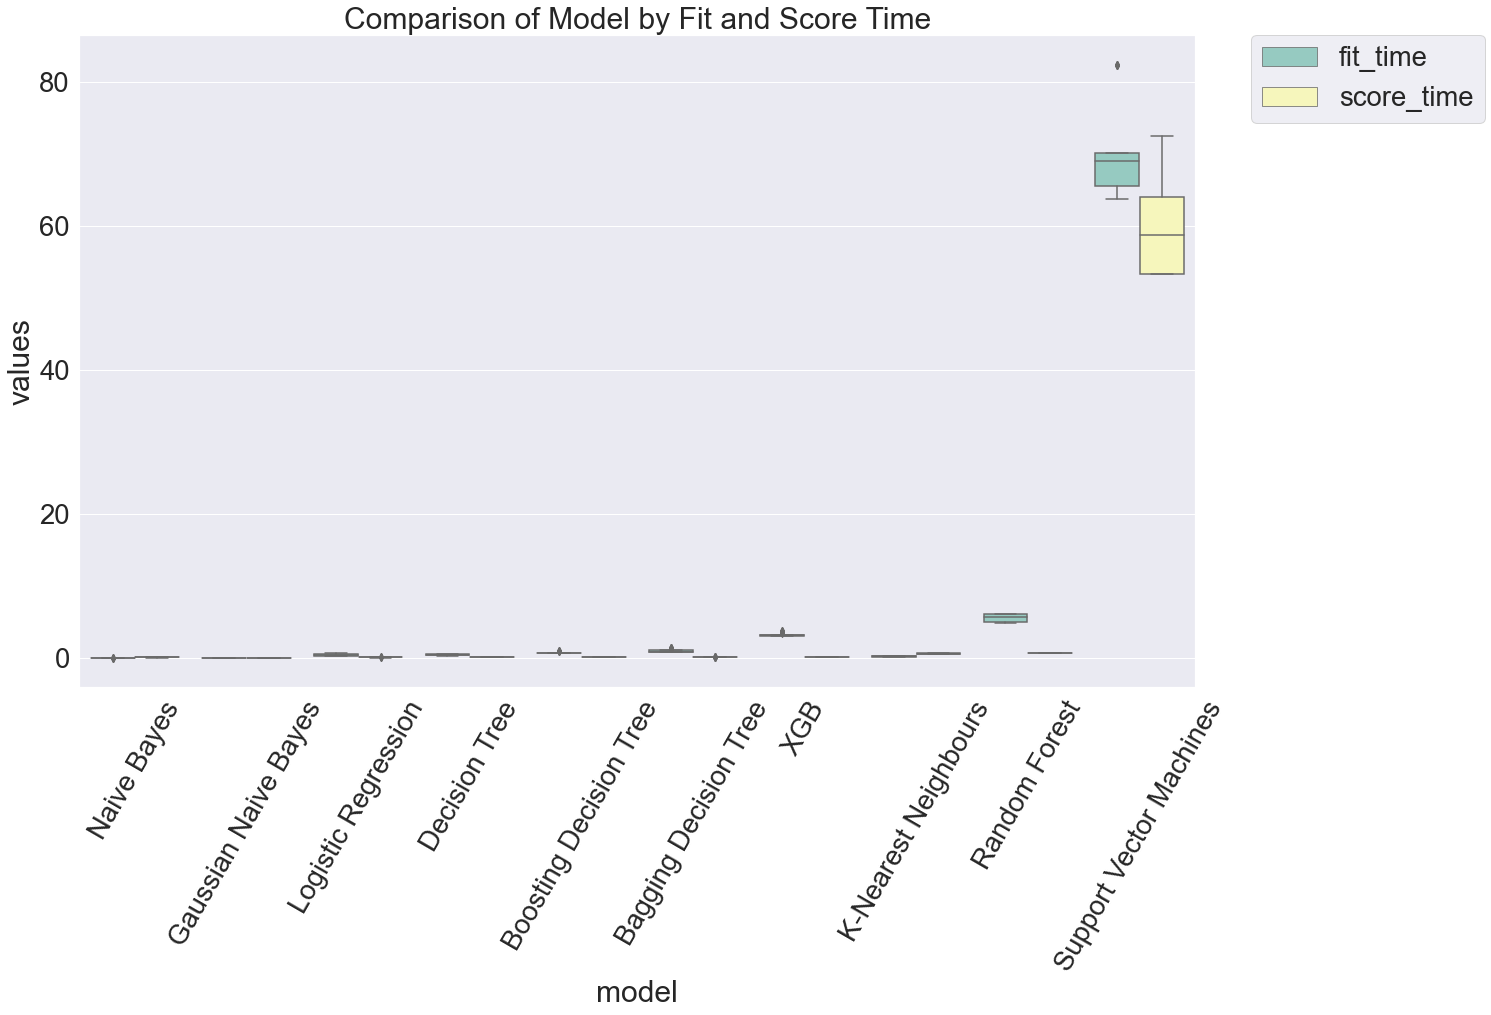

In [69]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.xticks(rotation = 60)
plt.show()

In [70]:
time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.std, np.mean])

score_time             fit_time           
                               std       mean       std       mean
model                                                             
Bagging Decision Tree     0.014683   0.076063  0.259308   0.970854
Boosting Decision Tree    0.012187   0.059109  0.089284   0.701687
Decision Tree             0.011575   0.056833  0.078125   0.387307
Gaussian Naive Bayes      0.000757   0.022966  0.002016   0.020450
K-Nearest Neighbours      0.047817   0.556631  0.024507   0.185449
Logistic Regression       0.004855   0.031668  0.139302   0.409985
Naive Bayes               0.004502   0.033534  0.004869   0.020066
Random Forest             0.037055   0.670917  0.516653   5.541832
Support Vector Machines   7.671049  60.644714  6.711372  70.152750
XGB                       0.007213   0.091601  0.246604   3.180527

#### Model run and score time results :-
- SVM again is least performing for fit and score run time
- Gaussian Naive Bayes is quickest for fit time and Logistic Regression for score time.
- Random Forest taken few seconds for fit and half second for score.

#### Applying hyper parameter tunning for Random Forest Classifier Model

In [71]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=150, num=15)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 150, num=15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rf = RandomForestClassifier(random_state=77)
                       
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=parameters, 
                           cv = 5, verbose=2, random_state=77,n_jobs=-1)

In [72]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=77),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150]},
                   random_state=77, verbose=2)

In [73]:
rf_random.best_params_

{'n_estimators': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 150,
 'bootstrap': False}

In [74]:
rf_random.best_score_

0.9156376131384694

[('Random Forest', RandomForestClassifier(bootstrap=False, max_depth=150, max_features='auto',
                       n_estimators=30, random_state=77))]
--------------------------------------------------
Random Forest:
Classification Matrix:
              precision    recall  f1-score   support

      <= 50K       0.96      0.90      0.93      7420
       > 50K       0.91      0.96      0.93      7399

    accuracy                           0.93     14819
   macro avg       0.93      0.93      0.93     14819
weighted avg       0.93      0.93      0.93     14819

Confusion Matrix:


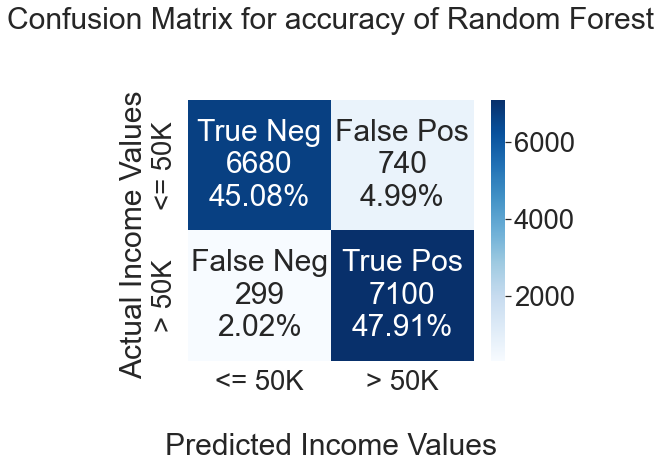

Time taken: 16.69 seconds


In [75]:
# Checking best model
models = [ ('Random Forest', RandomForestClassifier(n_estimators=30, min_samples_split=2,
                                 min_samples_leaf=1,max_features='auto',max_depth=150,bootstrap=False,random_state=77))
           ] 

# Running model and getting results
best_result = run_models(X_train,y_train,X_test,y_test,models)

## Results
- We have tried the 9 Classifier Model for predicting income and found Random Forest best performing with 91 % accuracy.
- We are further able to achieve 93 % accuracy in predicting income after hyperparameter tuning of the Random Forest Classifier model.
- We have fewer False Negative and positives for the hyperparameter-tuned Random Forest Classifier model.

## Insights
1. Education number, age and working hours per week have highest correlation with income
2. Higher number of education years have more changes of high income (> 50K). More people earning high income in compared to low income if number of years is higher than 14.
3. Interesting to see that individuals earning more than 50k dollars increase as age increase but then it starts decreasing with old age.41-60 age groups have comparable number of people for both high and low earning category.
4. There are more changes for high income if individual is working more than 40 hours.
5. Capital gainers are mostly in high income category and individual with capital loss are more likely in low-income category.
6. Female populations are more in low-income category in compared to male population.

## References
- This dataset named “adult” used in this project is downloaded from the UCI machine learning repository. Thanks to donors Ronny Kohavi and Barry Becker.
- Data extraction was done by Barry Becker from the 1994 US Census database.
- [UCI Link](https://archive.ics.uci.edu/ml/datasets/adult)

## Covering remaining assessment topic 
Few assessment points were not covered in the project dataset.<br>
Covering those remaining assessment point in the below code.

#### 2.Importing data : 
- a. Your project should make use of one or more of the following: 
    - Relational database, API or web scraping source in the report

In [76]:
# Choosen example of webscrapping as database and API needs personal token or password to run
# Web scraping to import some data from website.

# Importing required packages for web scrapping
from bs4 import BeautifulSoup
import requests 
import pandas as pd

# Wikipedia URL
web_url = 'https://en.wikipedia.org/wiki/All-time_Commonwealth_Games_medal_table'

# get HTML we page
html_page = requests.get(web_url)

# display scrapped data
# print(soup.prettify())

web_status = html_page.status_code

if web_status == 200:
    # scrape webpage using beautifulsoup
    soup = BeautifulSoup(html_page.content, "html.parser")
    # Find medal table in html
    medal_table = soup.find('table',{'class':'wikitable sortable plainrowheaders jquery-tablesorter'})
    df=pd.read_html(str(medal_table))
    # convert list to pandas dataframe
    countries_medal_table=pd.DataFrame(df[0])
    print(countries_medal_table)
else:
    print("Website URL is not accessible")
    print(f"Web URL status response : {web_status}")

                   Rank                    CGA  Gold  Silver  Bronze  Total
0                     1        Australia (AUS)  1003     834     767   2604
1                     2          England (ENG)   773     783     766   2322
2                     3           Canada (CAN)   510     548     589   1647
3                     4            India (IND)   203     190     171    564
4                     5      New Zealand (NZL)   179     232     295    706
..                  ...                    ...   ...     ...     ...    ...
60                   61   Norfolk Island (NFI)     0       0       2      2
61                   62     Cook Islands (COK)     0       0       1      1
62                   62             Niue (NIU)     0       0       1      1
63                   62  Solomon Islands (SOL)     0       0       1      1
64  Totals (64 entries)    Totals (64 entries)  3609    3603    3926  11138

[65 rows x 6 columns]


#### 3.a Analysing data: 
- Your project should use Regex to extract a pattern in data

In [77]:
# Regex example

# Importing required libraries
import re

pattern = r"\w+\.txt(?=\serror)"

test_log_string = "Info.txt transferred, details.txt transferred, project.txt error,report.txt error"

print("List all failed transferred files")
re.findall(pattern, test_log_string)

List all failed transferred files


['project.txt', 'report.txt']